In [174]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv("./weatherHistory.csv/weatherHistory.csv")

In [100]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [101]:
df[["Date","Time_Zone"]] = df["Formatted Date"].str.split('+',expand=True)

In [102]:
df = df.drop(columns=["Formatted Date"])

In [103]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,Time_Zone
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01 00:00:00.000,0200
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01 01:00:00.000,0200
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 02:00:00.000,0200
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 03:00:00.000,0200
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 04:00:00.000,0200


In [104]:
df["Date"] = pd.to_datetime(df["Date"])

In [105]:
df["day"] = df["Date"].dt.day

In [106]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,Time_Zone,day
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01 00:00:00,0200,1
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01 01:00:00,0200,1
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 02:00:00,0200,1
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 03:00:00,0200,1
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 04:00:00,0200,1


In [107]:
df["month"] = df["Date"].dt.month

In [108]:
df["year"] = df["Date"].dt.year

In [109]:
df = df.drop(columns=["Date"])

In [110]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Time_Zone,day,month,year
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,0200,1,4,2006
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,0200,1,4,2006
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,0200,1,4,2006
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,0200,1,4,2006
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,0200,1,4,2006


In [111]:
df = df.reindex(columns=["day","month","year","Time_Zone","Summary","Precip Type","Temperature (C)","Apparent Temperature (C)","Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Visibility (km)","Loud Cover","Daily Summary"])

In [112]:
df.head()

,day,month,year,Time_Zone,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Daily Summary
0,1,4,2006,0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,Partly cloudy throughout the day.
1,1,4,2006,0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,Partly cloudy throughout the day.
2,1,4,2006,0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,Partly cloudy throughout the day.
3,1,4,2006,0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,Partly cloudy throughout the day.
4,1,4,2006,0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,Partly cloudy throughout the day.


In [113]:
df.dtypes

day                           int32
month                         int32
year                          int32
Time_Zone                    object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Daily Summary                object
dtype: object

In [114]:
df.isnull().sum()

day                           0
month                         0
year                          0
Time_Zone                     0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Daily Summary                 0
dtype: int64

In [115]:
df = df.dropna()

In [116]:
df.isnull().sum()

day                         0
month                       0
year                        0
Time_Zone                   0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Daily Summary               0
dtype: int64

In [117]:
df = df.drop(columns=["Loud Cover"])

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95936 entries, 0 to 96452
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   day                       95936 non-null  int32  
 1   month                     95936 non-null  int32  
 2   year                      95936 non-null  int32  
 3   Time_Zone                 95936 non-null  object 
 4   Summary                   95936 non-null  object 
 5   Precip Type               95936 non-null  object 
 6   Temperature (C)           95936 non-null  float64
 7   Apparent Temperature (C)  95936 non-null  float64
 8   Humidity                  95936 non-null  float64
 9   Wind Speed (km/h)         95936 non-null  float64
 10  Wind Bearing (degrees)    95936 non-null  float64
 11  Visibility (km)           95936 non-null  float64
 12  Daily Summary             95936 non-null  object 
dtypes: float64(6), int32(3), object(4)
memory usage: 9.1+ MB


In [119]:
df["Precip Type"] = df["Precip Type"].map({'rain':0,'snow':1})

In [120]:
df["Summary"].value_counts()

Summary
Partly Cloudy                          31635
Mostly Cloudy                          27914
Overcast                               16516
Clear                                  10763
Foggy                                   7117
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Hu

In [121]:
df_1 = df[(df["Summary"] == "Partly Cloudy") | (df["Summary"] == "Mostly Cloudy") | (df["Summary"] == "Overcast") | (df["Summary"] == "Clear") | (df["Summary"] == "Foggy")]

In [122]:
temp_Sum = df_1.groupby("Summary",as_index=False)["Temperature (C)"].mean()

In [123]:
fig = px.bar(temp_Sum,x="Summary",y="Temperature (C)",color="Summary")

In [124]:
fig.show()

In [125]:
wind_speed_Sum = df_1.groupby("Summary",as_index=False)["Wind Speed (km/h)"].mean()

In [126]:
fig_win = px.bar(wind_speed_Sum,x="Summary",y="Wind Speed (km/h)",color="Summary")

In [127]:
fig_win.show()

In [128]:
humidity_vs_Summary = df_1.groupby("Summary",as_index=False)["Humidity"].mean()

In [129]:
fig_h = px.bar(humidity_vs_Summary,x="Summary",y="Humidity",color="Summary")

In [130]:
fig_h.show()

In [131]:
apparant_S = df_1.groupby("Summary",as_index=False)["Apparent Temperature (C)"].mean()

In [132]:
fig_a = px.bar(apparant_S,x="Summary",y="Apparent Temperature (C)",color="Summary")

In [133]:
fig_a.show()

In [134]:
visibility_S = df_1.groupby("Summary",as_index=False)["Visibility (km)"].mean()

In [135]:
fig_v = px.bar(visibility_S,x="Summary",y="Visibility (km)",color="Summary")

In [136]:
fig_v.show()

In [137]:
wind_b_s = df_1.groupby("Summary",as_index=False)["Wind Bearing (degrees)"].mean()

In [138]:
fig_wb = px.bar(wind_b_s,x="Summary",y="Wind Bearing (degrees)",color="Summary")

In [139]:
fig_wb.show()

In [140]:
month_S = df_1.groupby("month",as_index=False)["Summary"].value_counts()

In [141]:
fig = px.bar(month_S,x="month",y="count",color ="Summary",barmode="group")

In [142]:
fig.show()

In [143]:
year_s = df_1.groupby("year",as_index=False)["Summary"].value_counts()

In [144]:
fig = px.bar(year_s,x="year",y="count",color ="Summary",barmode="group")

In [145]:
fig.show()

In [146]:
X = df_1[["month","year","Apparent Temperature (C)","Visibility (km)","Wind Speed (km/h)","Humidity","Precip Type"]]
Y = df_1["Summary"]
Y = LabelEncoder().fit_transform(Y)


In [ ]:
parameters = {'criterion':['gini', 'entropy', 'log_loss'], 
              'min_samples_split': [2, 5]}
rf = RandomForestClassifier()
gc = GridSearchCV(rf,parameters,cv=5)
gc.fit(x_train,y_train)

In [147]:
df = df.dropna()

In [148]:
df.isnull().sum()

day                         0
month                       0
year                        0
Time_Zone                   0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Daily Summary               0
dtype: int64

In [149]:
df =df.drop_duplicates()

In [150]:
df[df.duplicated()]

,day,month,year,Time_Zone,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Daily Summary


In [151]:
df_1["Summary"].value_counts()

Summary
Partly Cloudy    31635
Mostly Cloudy    27914
Overcast         16516
Clear            10763
Foggy             7117
Name: count, dtype: int64

In [152]:
df_1 = df_1.dropna()

In [153]:
mask = (df_1["Summary"] == "Partly Cloudy") | (df_1["Summary"] == "Mostly Cloudy")
df_1.loc[mask, "Summary"] = "Cloudy"

In [154]:
X = df_1.drop(columns=["Summary","Daily Summary"])

In [155]:
Y = df_1["Summary"]
Y = LabelEncoder().fit_transform(Y)

In [156]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify=Y)

In [157]:
x_train_tr = StandardScaler().fit_transform(x_train)

In [132]:
parameters = {'criterion':['gini', 'entropy', 'log_loss'], 
              'min_samples_split': [2, 5]}
rf = RandomForestClassifier()
gc = GridSearchCV(rf,parameters,cv=5)
gc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_split': [2, 5]})

In [136]:
gc.best_estimator_.score(x_test,y_test)

0.9783754993342211

In [158]:
df.head()

,day,month,year,Time_Zone,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Daily Summary
0,1,4,2006,0200,Partly Cloudy,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,Partly cloudy throughout the day.
1,1,4,2006,0200,Partly Cloudy,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,Partly cloudy throughout the day.
2,1,4,2006,0200,Mostly Cloudy,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,Partly cloudy throughout the day.
3,1,4,2006,0200,Partly Cloudy,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,Partly cloudy throughout the day.
4,1,4,2006,0200,Mostly Cloudy,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,Partly cloudy throughout the day.


In [159]:
df["Summary"].value_counts()

Summary
Partly Cloudy                          31615
Mostly Cloudy                          27901
Overcast                               16497
Clear                                  10738
Foggy                                   7109
Breezy and Overcast                      526
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 385
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Hu

In [163]:
df_2 = df[(df["Summary"] == "Partly Cloudy")|(df["Summary"] == "Mostly Cloudy")]

In [164]:
df_2.head()

,day,month,year,Time_Zone,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Daily Summary
0,1,4,2006,0200,Partly Cloudy,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,Partly cloudy throughout the day.
1,1,4,2006,0200,Partly Cloudy,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,Partly cloudy throughout the day.
2,1,4,2006,0200,Mostly Cloudy,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,Partly cloudy throughout the day.
3,1,4,2006,0200,Partly Cloudy,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,Partly cloudy throughout the day.
4,1,4,2006,0200,Mostly Cloudy,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,Partly cloudy throughout the day.


In [165]:
df_2["Summary"].value_counts()

Summary
Partly Cloudy    31615
Mostly Cloudy    27901
Name: count, dtype: int64

In [167]:
df_2["Summary"] = df_2["Summary"].map({"Partly Cloudy":3,"Mostly Cloudy":4})

C:\Users\tejan\AppData\Local\Temp\ipykernel_4604\2320249839.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [189]:
df_2 = df_2.drop(columns=["Time_Zone"])

In [190]:
correlation = df_2.corr()

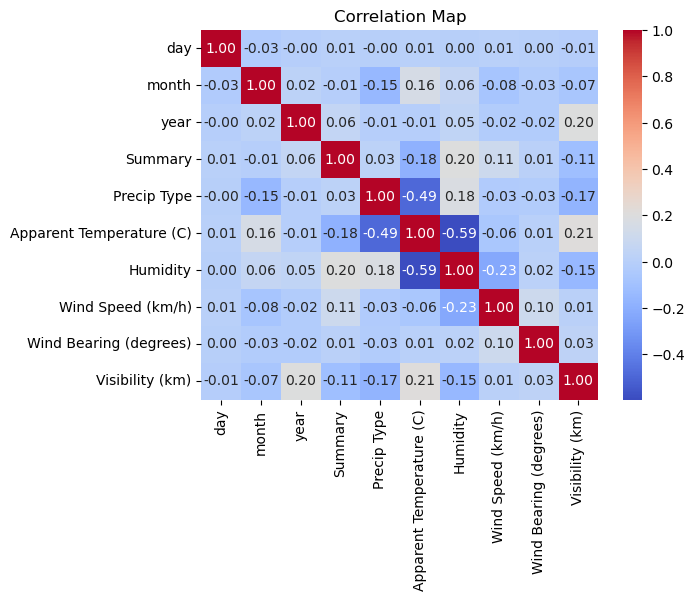

In [191]:
sns.heatmap(correlation,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Map")
plt.show()

In [212]:
X = df_2.drop(columns=["Summary","Precip Type"])

In [213]:
Y = df_2["Summary"]

In [214]:
X.head()

,day,month,year,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km)
0,1,4,2006,7.388889,0.89,14.1197,251.0,15.8263
1,1,4,2006,7.227778,0.86,14.2646,259.0,15.8263
2,1,4,2006,9.377778,0.89,3.9284,204.0,14.9569
3,1,4,2006,5.944444,0.83,14.1036,269.0,15.8263
4,1,4,2006,6.977778,0.83,11.0446,259.0,15.8263


In [215]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify=Y)

In [216]:
parameters = {'criterion':['gini', 'entropy', 'log_loss'], 
              'min_samples_split': [2, 5]}
rf = RandomForestClassifier()
gc = GridSearchCV(rf,parameters,cv=5)
gc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_split': [2, 5]})

In [217]:
gc.best_estimator_.score(x_test,y_test)

0.7316028225806451

In [218]:
apparent_summary = df_2.groupby("Summary",as_index=False)["Precip Type"].value_counts()

In [210]:
fig = px.bar(apparent_summary,x="Summary",y="count",color="Precip Type")

In [211]:
fig.show()